In [98]:
import pandas as pd

# NLTK
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# TextBlob
from textblob import TextBlob

# Stanza
import stanza
stanza.download('en')

import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sheenasalwan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


2022-10-12 14:17:09 INFO: Downloading default packages for language: en (English) ...


2022-10-12 14:17:10 INFO: File exists: /Users/sheenasalwan/stanza_resources/en/default.zip
2022-10-12 14:17:13 INFO: Finished downloading models and saved to /Users/sheenasalwan/stanza_resources.


In [62]:
df_tweet = pd.read_csv("../data/vaccination_tweets_cleaned.csv")

In [63]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222104 entries, 0 to 222103
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        222104 non-null  object 
 1   id                222102 non-null  object 
 2   user_name         222102 non-null  object 
 3   user_location     160777 non-null  object 
 4   user_description  207325 non-null  object 
 5   user_created      206971 non-null  object 
 6   user_followers    206967 non-null  object 
 7   user_friends      206967 non-null  object 
 8   user_favourites   206965 non-null  object 
 9   user_verified     206967 non-null  object 
 10  date              206967 non-null  object 
 11  text              206967 non-null  object 
 12  hashtags          161355 non-null  object 
 13  source            206834 non-null  object 
 14  retweets          206953 non-null  float64
 15  favorites         206953 non-null  float64
 16  is_retweet        20

#### Sentiment Analysis with NLTK Vader

In [74]:
# Define function to get value counts
def get_value_counts(col_name, analyzer_name):
    count = pd.DataFrame(df_tweet[col_name].value_counts())
    percentage = pd.DataFrame(df_tweet[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
    value_counts_df['analyzer'] = analyzer_name
    return value_counts_df

In [66]:
sia = SentimentIntensityAnalyzer()

# Obtaining NLTK scores
df_tweet['nltk_scores'] = df_tweet['text'].apply(lambda x: sia.polarity_scores(x))

# Obtaining NLTK compound score
df_tweet['nltk_cmp_score'] = df_tweet['nltk_scores'].apply(lambda score_dict: score_dict['compound'])

In [67]:
neutral_thresh = 0.05

In [68]:
# Categorize scores into the sentiments of positive, neutral or negative
df_tweet['nltk_sentiment'] = df_tweet['nltk_cmp_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))


In [70]:
df_tweet.tail()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,nltk_scores,nltk_cmp_score,nltk_sentiment
206962,1445962108055732232,COVID News,Estados Unidos,News about COVID-19,2013-06-05 08:52:31,3373,1472,129,False,2021-10-07 04:00:05,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",Revive Social App,0,0,False,"{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'comp...",0.6166,Positive
206963,1445956889305440264,CoWIN Blore 18-44,"Bengaluru, India",Get instant alerts for Free/Paid slots in BBMP...,2021-06-29 09:33:13,21,0,2,False,2021-10-07 03:39:21,Pincode: 560011\nSPUTNIK V - Dose 1: 100 slots...,NaN,CowinAlertsBot,0,0,False,"{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...",0.5473,Positive
206964,1445954643419226114,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,26,0,0,False,2021-10-07 03:30:26,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False,"{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...",0.6166,Positive
206965,1445954599345475592,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,26,0,0,False,2021-10-07 03:30:15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False,"{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'comp...",0.6166,Positive
206966,1445947047052333057,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,26,0,0,False,2021-10-07 03:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False,"{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'comp...",0.6166,Positive


In [69]:
df_tweet['nltk_cmp_score'].describe()

count    206967.000000
mean          0.095008
std           0.338118
min          -0.968200
25%           0.000000
50%           0.000000
75%           0.361200
max           0.984700
Name: nltk_cmp_score, dtype: float64

In [75]:
nltk_sentiment_df = get_value_counts('nltk_sentiment','NLTK Vader')
nltk_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,32920,15.91,NLTK Vader
1,Neutral,105260,50.86,NLTK Vader
2,Positive,68787,33.24,NLTK Vader


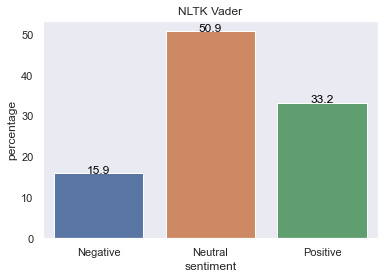

In [78]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=nltk_sentiment_df)
ax.set_title('NLTK Vader')

for index, row in nltk_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

#### Sentiment Analysis with TextBlob

In [79]:
# Obtain polarity scores generated by TextBlob
df_tweet['textblob_score'] = df_tweet['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [80]:
neutral_thresh = 0.05

In [81]:
# Convert polarity score into sentiment categories
df_tweet['textblob_sentiment'] = df_tweet['textblob_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))


In [83]:
df_tweet['textblob_score'].describe()

count    206967.000000
mean          0.087042
std           0.223826
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.175000
max           1.000000
Name: textblob_score, dtype: float64

In [84]:
textblob_sentiment_df = get_value_counts('textblob_sentiment','TextBlob')
textblob_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,19877,9.60,TextBlob
1,Neutral,118182,57.10,TextBlob
2,Positive,68908,33.29,TextBlob


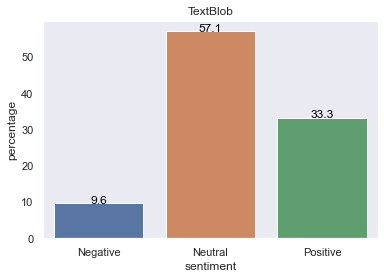

In [85]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=textblob_sentiment_df)
ax.set_title('TextBlob')

for index, row in textblob_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

#### Average

In [86]:
df_tweet['composite_score'] =  (df_tweet['nltk_cmp_score'] 
                                + df_tweet['textblob_score']
                                )/2

In [94]:
neutral_thresh = 0.05

In [95]:
# Convert average sentiment score (from all 3 analyzers) into sentiment categories
df_tweet['composite_vote_2'] = df_tweet['composite_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

In [96]:
composite_sentiment_df_2 = get_value_counts('composite_vote_2','Composite Sentiment')
composite_sentiment_df_2

,sentiment,counts,percentage,analyzer
0,Negative,28370,13.71,Composite Sentiment
1,Neutral,101626,49.10,Composite Sentiment
2,Positive,76971,37.19,Composite Sentiment


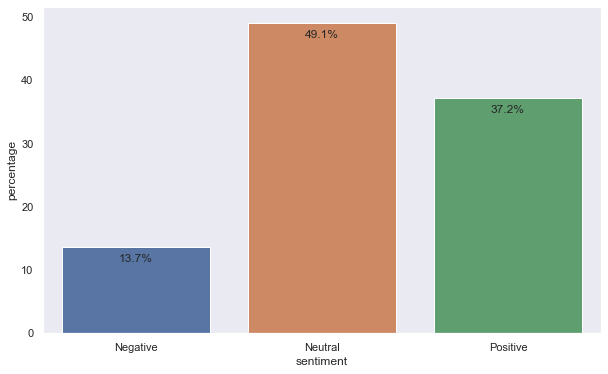

In [99]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="sentiment", y="percentage",
                 data=composite_sentiment_df_2)

# Display annotations
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(),1)}%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

In [100]:
df_tweet.to_csv("../data/vaccination_tweets_sentiment.csv")

In [101]:
df_tweet

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,retweets,favorites,is_retweet,nltk_scores,nltk_cmp_score,nltk_sentiment,textblob_score,textblob_sentiment,composite_score,composite_vote_2
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,...,0,0,False,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.4019,Positive,0.00,Neutral,0.20095,Positive
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,...,1,1,False,"{'neg': 0.125, 'neu': 0.766, 'pos': 0.109, 'co...",-0.1027,Negative,-0.50,Negative,-0.30135,Negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,...,0,0,False,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",0.2500,Positive,0.00,Neutral,0.12500,Positive
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,...,446,2129,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,-0.05,Negative,-0.02500,Neutral
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,...,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,0.00,Neutral,0.00000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206962,1445962108055732232,COVID News,Estados Unidos,News about COVID-19,2013-06-05 08:52:31,3373,1472,129,False,2021-10-07 04:00:05,...,0,0,False,"{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'comp...",0.6166,Positive,0.20,Positive,0.40830,Positive
206963,1445956889305440264,CoWIN Blore 18-44,"Bengaluru, India",Get instant alerts for Free/Paid slots in BBMP...,2021-06-29 09:33:13,21,0,2,False,2021-10-07 03:39:21,...,0,0,False,"{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...",0.5473,Positive,0.00,Neutral,0.27365,Positive
206964,1445954643419226114,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,26,0,0,False,2021-10-07 03:30:26,...,0,1,False,"{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...",0.6166,Positive,0.40,Positive,0.50830,Positive
206965,1445954599345475592,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,26,0,0,False,2021-10-07 03:30:15,...,0,0,False,"{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'comp...",0.6166,Positive,0.20,Positive,0.40830,Positive
